In [134]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt
%matplotlib inline

In [133]:
melbourne_data = read_csv ('C:\\Users\\DELL\\Desktop\\melbournedata\\melb_data.csv')

In [131]:
print (melbourne_data.shape)
melbourne_data.head (5)

(13580, 21)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,2016-12-03,2.5,3067,...,1,1.0,202,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2016-02-04,2.5,3067,...,1,0.0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,2017-03-04,2.5,3067,...,2,0.0,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,2017-03-04,2.5,3067,...,2,1.0,94,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,2016-06-04,2.5,3067,...,1,2.0,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019


In [135]:
melbourne_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  int64  
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  int64  
 10  Bedroom2       13580 non-null  int64  
 11  Bathroom       13580 non-null  int64  
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  int64  
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [137]:
print(melbourne_data.select_dtypes(['object']).columns)

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [139]:
cat=['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea','Regionname']
for colname in cat:
    melbourne_data[colname] = melbourne_data[colname].astype('category')

In [140]:
melbourne_data['Date'] = pd.to_datetime(melbourne_data['Date'])

In [141]:
print (melbourne_data ['Date'])

0       2016-03-12
1       2016-04-02
2       2017-04-03
3       2017-04-03
4       2016-04-06
           ...    
13575   2017-08-26
13576   2017-08-26
13577   2017-08-26
13578   2017-08-26
13579   2017-08-26
Name: Date, Length: 13580, dtype: datetime64[ns]


In [142]:
melbourne_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,13580.0,2.937997e+00,0.955748,1.00000,2.000000,3.000000,3.000000e+00,1.000000e+01
Price,13580.0,1.075684e+06,639310.724296,85000.00000,650000.000000,903000.000000,1.330000e+06,9.000000e+06
Distance,13580.0,1.013778e+01,5.868725,0.00000,6.100000,9.200000,1.300000e+01,4.810000e+01
Postcode,13580.0,3.105302e+03,90.676964,3000.00000,3044.000000,3084.000000,3.148000e+03,3.977000e+03
Bedroom2,13580.0,2.914728e+00,0.965921,0.00000,2.000000,3.000000,3.000000e+00,2.000000e+01
Bathroom,13580.0,1.534242e+00,0.691712,0.00000,1.000000,1.000000,2.000000e+00,8.000000e+00
Car,13518.0,1.610075e+00,0.962634,0.00000,1.000000,2.000000,2.000000e+00,1.000000e+01
Landsize,13580.0,5.584161e+02,3990.669241,0.00000,177.000000,440.000000,6.510000e+02,4.330140e+05
BuildingArea,7130.0,1.519676e+02,541.014538,0.00000,93.000000,126.000000,1.740000e+02,4.451500e+04
YearBuilt,8205.0,1.964684e+03,37.273762,1196.00000,1940.000000,1970.000000,1.999000e+03,2.018000e+03


In [146]:
ncat = ['Postcode']  

for colname in ncat:
    melbourne_data[colname] = melbourne_data[colname].astype('category')
melbourne_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13580 non-null  category      
 1   Address        13580 non-null  category      
 2   Rooms          13580 non-null  int64         
 3   Type           13580 non-null  category      
 4   Price          13580 non-null  int64         
 5   Method         13580 non-null  category      
 6   SellerG        13580 non-null  category      
 7   Date           13580 non-null  datetime64[ns]
 8   Distance       13580 non-null  float64       
 9   Postcode       13580 non-null  category      
 10  Bedroom2       13580 non-null  int64         
 11  Bathroom       13580 non-null  int64         
 12  Car            13518 non-null  float64       
 13  Landsize       13580 non-null  int64         
 14  BuildingArea   7130 non-null   float64       
 15  YearBuilt      8205

In [147]:
melbourne_data['Rooms v Bedroom2'] = melbourne_data['Rooms'] - melbourne_data['Bedroom2']
melbourne_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Rooms v Bedroom2
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,2016-03-12,2.5,3067,...,1.0,202,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019,0
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2016-04-02,2.5,3067,...,0.0,156,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019,0
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,2017-04-03,2.5,3067,...,0.0,134,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019,0
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,2017-04-03,2.5,3067,...,1.0,94,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019,0
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,2016-04-06,2.5,3067,...,2.0,120,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000,S,Barry,2017-08-26,16.7,3150,...,2.0,652,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392,0
13576,Williamstown,77 Merrett Dr,3,h,1031000,SP,Williams,2017-08-26,6.8,3016,...,2.0,333,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380,0
13577,Williamstown,83 Power St,3,h,1170000,S,Raine,2017-08-26,6.8,3016,...,4.0,436,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380,0
13578,Williamstown,96 Verdon St,4,h,2500000,PI,Sweeney,2017-08-26,6.8,3016,...,5.0,866,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380,0


In [148]:
melbourne_data = melbourne_data.drop(['Bedroom2','Rooms v Bedroom2'],1)

In [150]:
melbourne_data['Age'] = 2017 - melbourne_data['YearBuilt']

melbourne_data['Historic'] = np.where(melbourne_data['Age']>=50,'Historic','Contemporary')

melbourne_data['Historic'] = melbourne_data['Historic'].astype('category')

In [151]:
melbourne_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13580 non-null  category      
 1   Address        13580 non-null  category      
 2   Rooms          13580 non-null  int64         
 3   Type           13580 non-null  category      
 4   Price          13580 non-null  int64         
 5   Method         13580 non-null  category      
 6   SellerG        13580 non-null  category      
 7   Date           13580 non-null  datetime64[ns]
 8   Distance       13580 non-null  float64       
 9   Postcode       13580 non-null  category      
 10  Bathroom       13580 non-null  int64         
 11  Car            13518 non-null  float64       
 12  Landsize       13580 non-null  int64         
 13  BuildingArea   7130 non-null   float64       
 14  YearBuilt      8205 non-null   float64       
 15  CouncilArea    1221

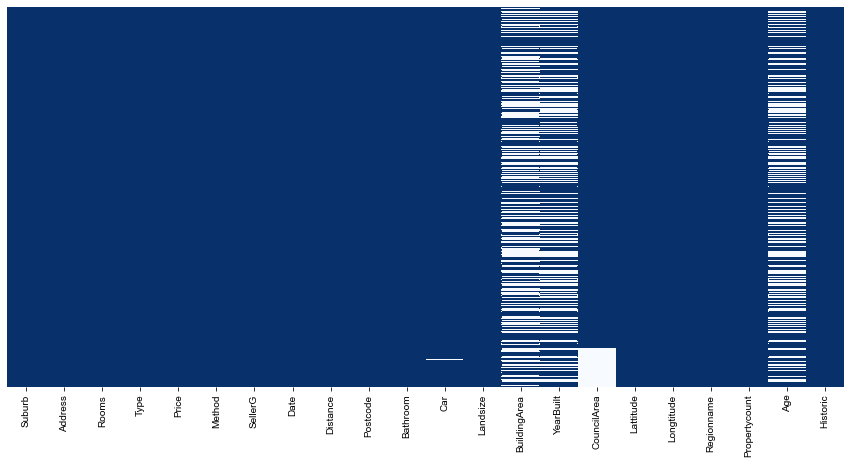

In [152]:
fig, ax = plt.subplots(figsize=(15,7))
sb.set(font_scale=1.2)
sb.heatmap(melbourne_data.isnull(),yticklabels = False, cbar = False, cmap = 'Blues_r')
plt.show()

In [154]:
melbourne_data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
Age              5375
Historic            0
dtype: int64

In [155]:
melbourne_data.isnull().sum()/len(melbourne_data)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price             0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.000000
Postcode          0.000000
Bathroom          0.000000
Car               0.456554
Landsize          0.000000
BuildingArea     47.496318
YearBuilt        39.580265
CouncilArea      10.081001
Lattitude         0.000000
Longtitude        0.000000
Regionname        0.000000
Propertycount     0.000000
Age              39.580265
Historic          0.000000
dtype: float64

In [158]:
melbourne_data = melbourne_data.dropna()

In [159]:
melbourne_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6196 entries, 1 to 12212
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         6196 non-null   category      
 1   Address        6196 non-null   category      
 2   Rooms          6196 non-null   int64         
 3   Type           6196 non-null   category      
 4   Price          6196 non-null   int64         
 5   Method         6196 non-null   category      
 6   SellerG        6196 non-null   category      
 7   Date           6196 non-null   datetime64[ns]
 8   Distance       6196 non-null   float64       
 9   Postcode       6196 non-null   category      
 10  Bathroom       6196 non-null   int64         
 11  Car            6196 non-null   float64       
 12  Landsize       6196 non-null   int64         
 13  BuildingArea   6196 non-null   float64       
 14  YearBuilt      6196 non-null   float64       
 15  CouncilArea    6196 

In [160]:
melbourne_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,6196.0,2.931407e+00,0.971079,1.00000,2.000000,3.00000,4.000000e+00,8.000000e+00
Price,6196.0,1.068828e+06,675156.427502,131000.00000,620000.000000,880000.00000,1.325000e+06,9.000000e+06
Distance,6196.0,9.751097e+00,5.612065,0.00000,5.900000,9.00000,1.240000e+01,4.740000e+01
Bathroom,6196.0,1.576340e+00,0.711362,1.00000,1.000000,1.00000,2.000000e+00,8.000000e+00
Car,6196.0,1.573596e+00,0.929947,0.00000,1.000000,1.00000,2.000000e+00,1.000000e+01
Landsize,6196.0,4.710069e+02,897.449881,0.00000,152.000000,373.00000,6.280000e+02,3.700000e+04
BuildingArea,6196.0,1.415686e+02,90.834824,0.00000,91.000000,124.00000,1.700000e+02,3.112000e+03
YearBuilt,6196.0,1.964082e+03,38.105673,1196.00000,1940.000000,1970.00000,2.000000e+03,2.018000e+03
Lattitude,6196.0,-3.780790e+01,0.075850,-38.16492,-37.855438,-37.80225,-3.775820e+01,-3.745709e+01
Longtitude,6196.0,1.449902e+02,0.099165,144.54237,144.926198,144.99580,1.450527e+02,1.455264e+02


In [162]:
melbourne_data[melbourne_data['Age']>800]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,Historic
9968,Mount Waverley,5 Armstrong St,3,h,1200000,VB,McGrath,2017-06-24,14.2,3149,...,807,117.0,1196.0,Monash,-37.86788,145.12121,Eastern Metropolitan,13366,821.0,Historic


In [165]:
melbourne_data[melbourne_data['BuildingArea']==0]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,Historic
4344,North Melbourne,19 Shands La,2,t,841000,S,Jellis,2017-04-03,2.3,3051,...,215,0.0,2000.0,Melbourne,-37.7953,144.9437,Northern Metropolitan,6821,17.0,Contemporary


In [166]:
melbourne_data[melbourne_data['Landsize']==0]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,Historic
12,Abbotsford,123/56 Nicholson St,2,u,750000,S,Biggin,2016-12-11,2.5,3067,...,0,94.00,2009.0,Yarra,-37.80780,144.99650,Northern Metropolitan,4019,8.0,Contemporary
23,Abbotsford,6/219 Nicholson St,2,u,500000,S,Collins,2016-06-18,2.5,3067,...,0,60.00,1970.0,Yarra,-37.80150,144.99720,Northern Metropolitan,4019,47.0,Contemporary
33,Abbotsford,11/205 Gipps St,1,u,470000,S,Nelson,2016-07-26,2.5,3067,...,0,50.00,2013.0,Yarra,-37.80550,144.99610,Northern Metropolitan,4019,4.0,Contemporary
39,Airport West,50 Bedford St,3,h,730000,VB,Nelson,2016-03-12,13.5,3042,...,0,145.00,1965.0,Moonee Valley,-37.72030,144.87550,Western Metropolitan,3464,52.0,Historic
40,Airport West,50 Bedford St,3,h,770000,SP,Nelson,2017-04-03,13.5,3042,...,0,145.00,1965.0,Moonee Valley,-37.72030,144.87550,Western Metropolitan,3464,52.0,Historic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12164,South Yarra,9/17 Howitt St,2,u,570000,VB,Ray,2017-07-29,2.7,3141,...,0,64.00,1965.0,Stonnington,-37.84679,145.00206,Southern Metropolitan,14887,52.0,Historic
12168,St Kilda,45/151 Fitzroy St,2,u,600000,VB,hockingstuart,2017-07-29,5.0,3182,...,0,82.00,1930.0,Port Phillip,-37.85911,144.97900,Southern Metropolitan,13240,87.0,Historic
12188,Tullamarine,9/200 Melrose Dr,2,u,300000,SP,Jason,2017-07-29,12.9,3043,...,0,66.32,1980.0,Hume,-37.69815,144.88019,Western Metropolitan,3296,37.0,Contemporary
12207,Williamstown,2/29 Dover Rd,1,u,385000,SP,Williams,2017-07-29,6.8,3016,...,0,35.64,1967.0,Hobsons Bay,-37.85588,144.89936,Western Metropolitan,6380,50.0,Historic


<AxesSubplot:xlabel='Date'>

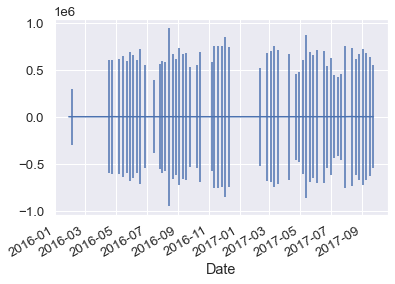

In [167]:
meanData ['Landsize'].plot (yerr = value['Price'])

In [168]:
melbourne_data = melbourne_data[melbourne_data['BuildingArea']!=0]
melbourne_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,6195.0,2.931558e+00,0.971085,1.00000,2.000000,3.0000,4.000000e+00,8.000000e+00
Price,6195.0,1.068865e+06,675204.719649,131000.00000,620000.000000,880000.0000,1.325000e+06,9.000000e+06
Distance,6195.0,9.752300e+00,5.611720,0.00000,5.900000,9.0000,1.240000e+01,4.740000e+01
Bathroom,6195.0,1.576433e+00,0.711382,1.00000,1.000000,1.0000,2.000000e+00,8.000000e+00
Car,6195.0,1.573688e+00,0.929993,0.00000,1.000000,1.0000,2.000000e+00,1.000000e+01
Landsize,6195.0,4.710483e+02,897.516427,0.00000,152.000000,373.0000,6.280000e+02,3.700000e+04
BuildingArea,6195.0,1.415915e+02,90.824342,1.00000,91.000000,124.0000,1.700000e+02,3.112000e+03
YearBuilt,6195.0,1.964076e+03,38.106016,1196.00000,1940.000000,1970.0000,2.000000e+03,2.018000e+03
Lattitude,6195.0,-3.780791e+01,0.075856,-38.16492,-37.855455,-37.8023,-3.775820e+01,-3.745709e+01
Longtitude,6195.0,1.449902e+02,0.099171,144.54237,144.926195,144.9958,1.450527e+02,1.455264e+02


<AxesSubplot:xlabel='Price'>

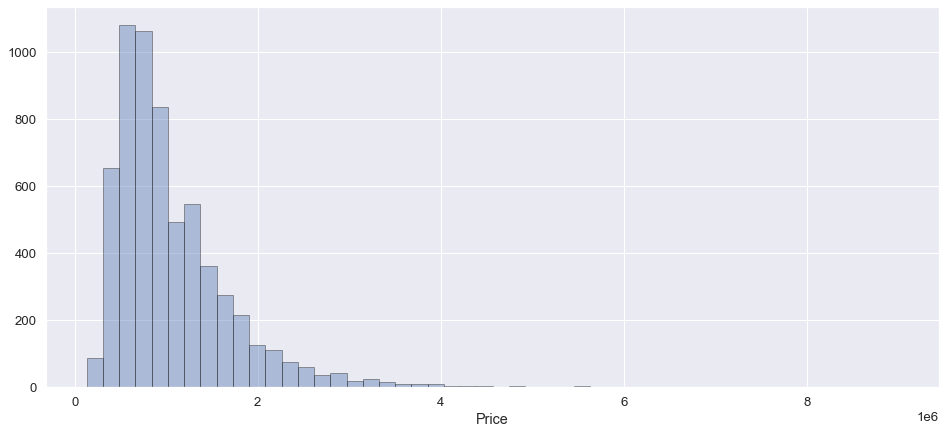

In [174]:
plt.figure(figsize=(16,7))
sb.distplot(melbourne_data['Price'], kde = False,hist_kws=dict(edgecolor="k"))

In [172]:
melbourne_data.select_dtypes(['category']).columns

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Postcode',
       'CouncilArea', 'Regionname', 'Historic'],
      dtype='object')

In [177]:
melbourne_data['Regionname'] = melbourne_data['Regionname'].map({'Northern Metropolitan':'NM',
                                            'Western Metropolitan':'WM', 
                                            'Southern Metropolitan':'SM', 
                                            'Eastern Metropolitan':'EM', 
                                            'South-Eastern Metropolitan':'SEM', 
                                            'Northern Victoria':'NV',
                                            'Eastern Victoria':'EV',
                                            'Western Victoria':'WV'})

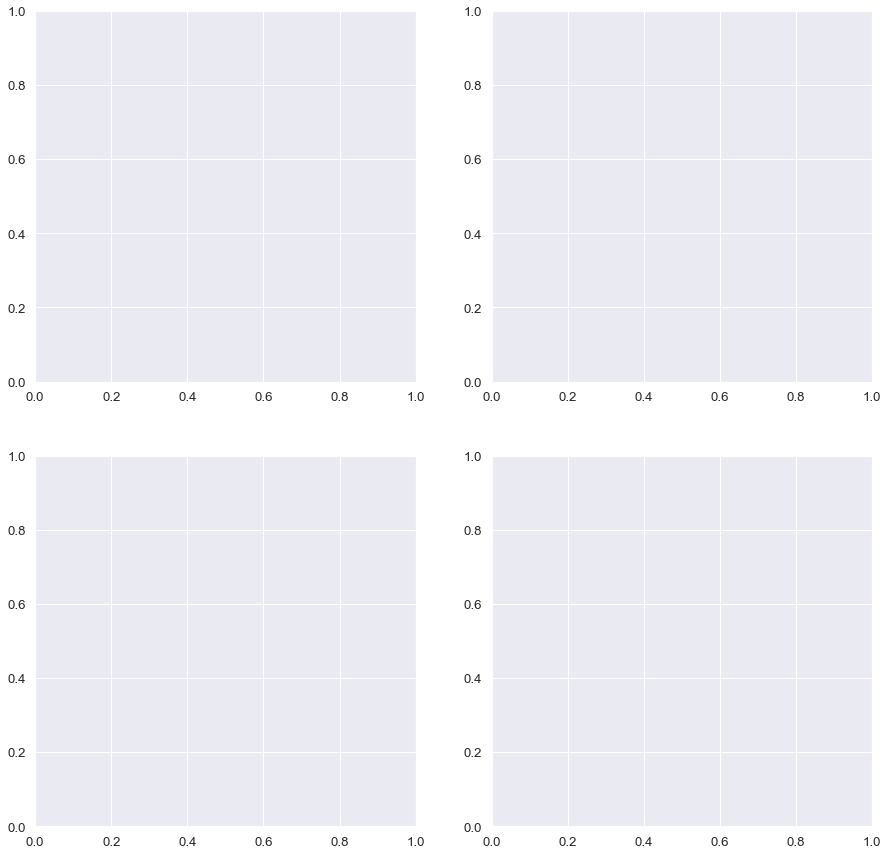

In [178]:
sb.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (15,15))

In [180]:
sb.boxplot(data = melbourne_data, x = 'Type', y = 'Price', ax = axes[0,0])
axes[0,0].set_xlabel('Type')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Type v Price')

Text(0.5, 1.0, 'Type v Price')

In [181]:
sb.boxplot(x = 'Method', y = 'Price', data = melbourne_data, ax = axes[0,1])
axes[0,1].set_xlabel('Method')
axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Method v Price')

Text(0.5, 1.0, 'Method v Price')

In [183]:
sb.boxplot(x = 'Historic', y = 'Price', data = melbourne_data, ax = axes[1,1])
axes[1,1].set_xlabel('Historic')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Historic v Price')

plt.show()

In [184]:
melbourne_data.select_dtypes(['float64','int64']).columns

Index(['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount',
       'Age'],
      dtype='object')

<AxesSubplot:xlabel='Suburb'>

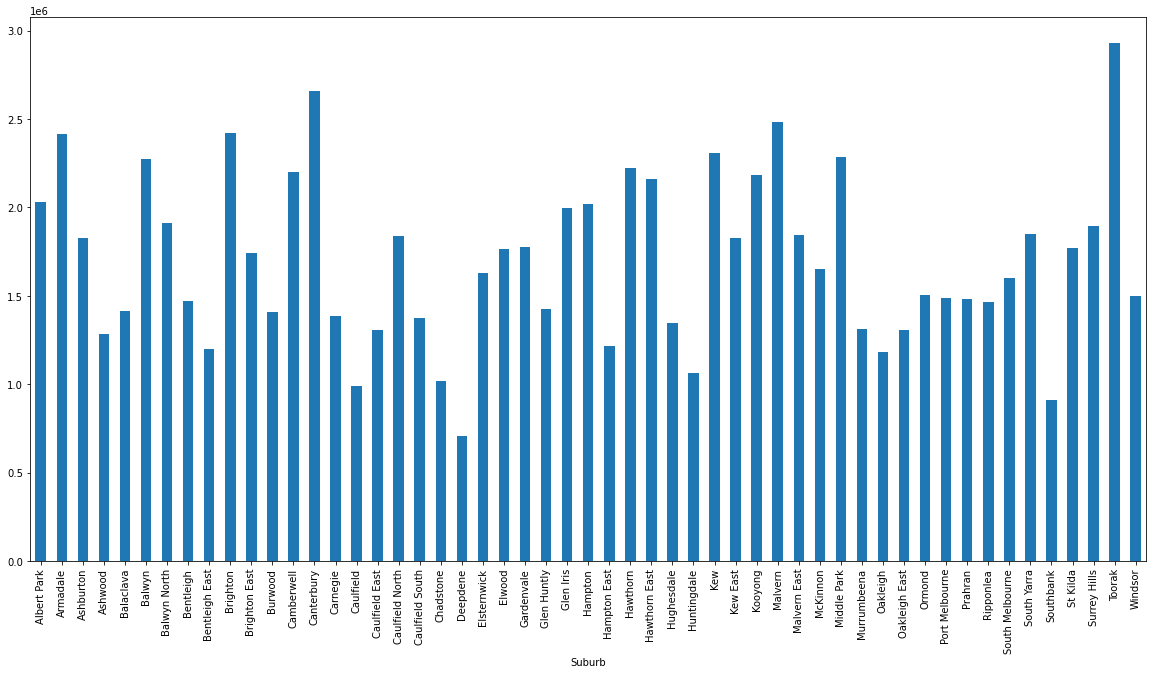

In [96]:
featureSouthern_M ['Price'].plot (kind = 'bar', figsize = (20, 10))

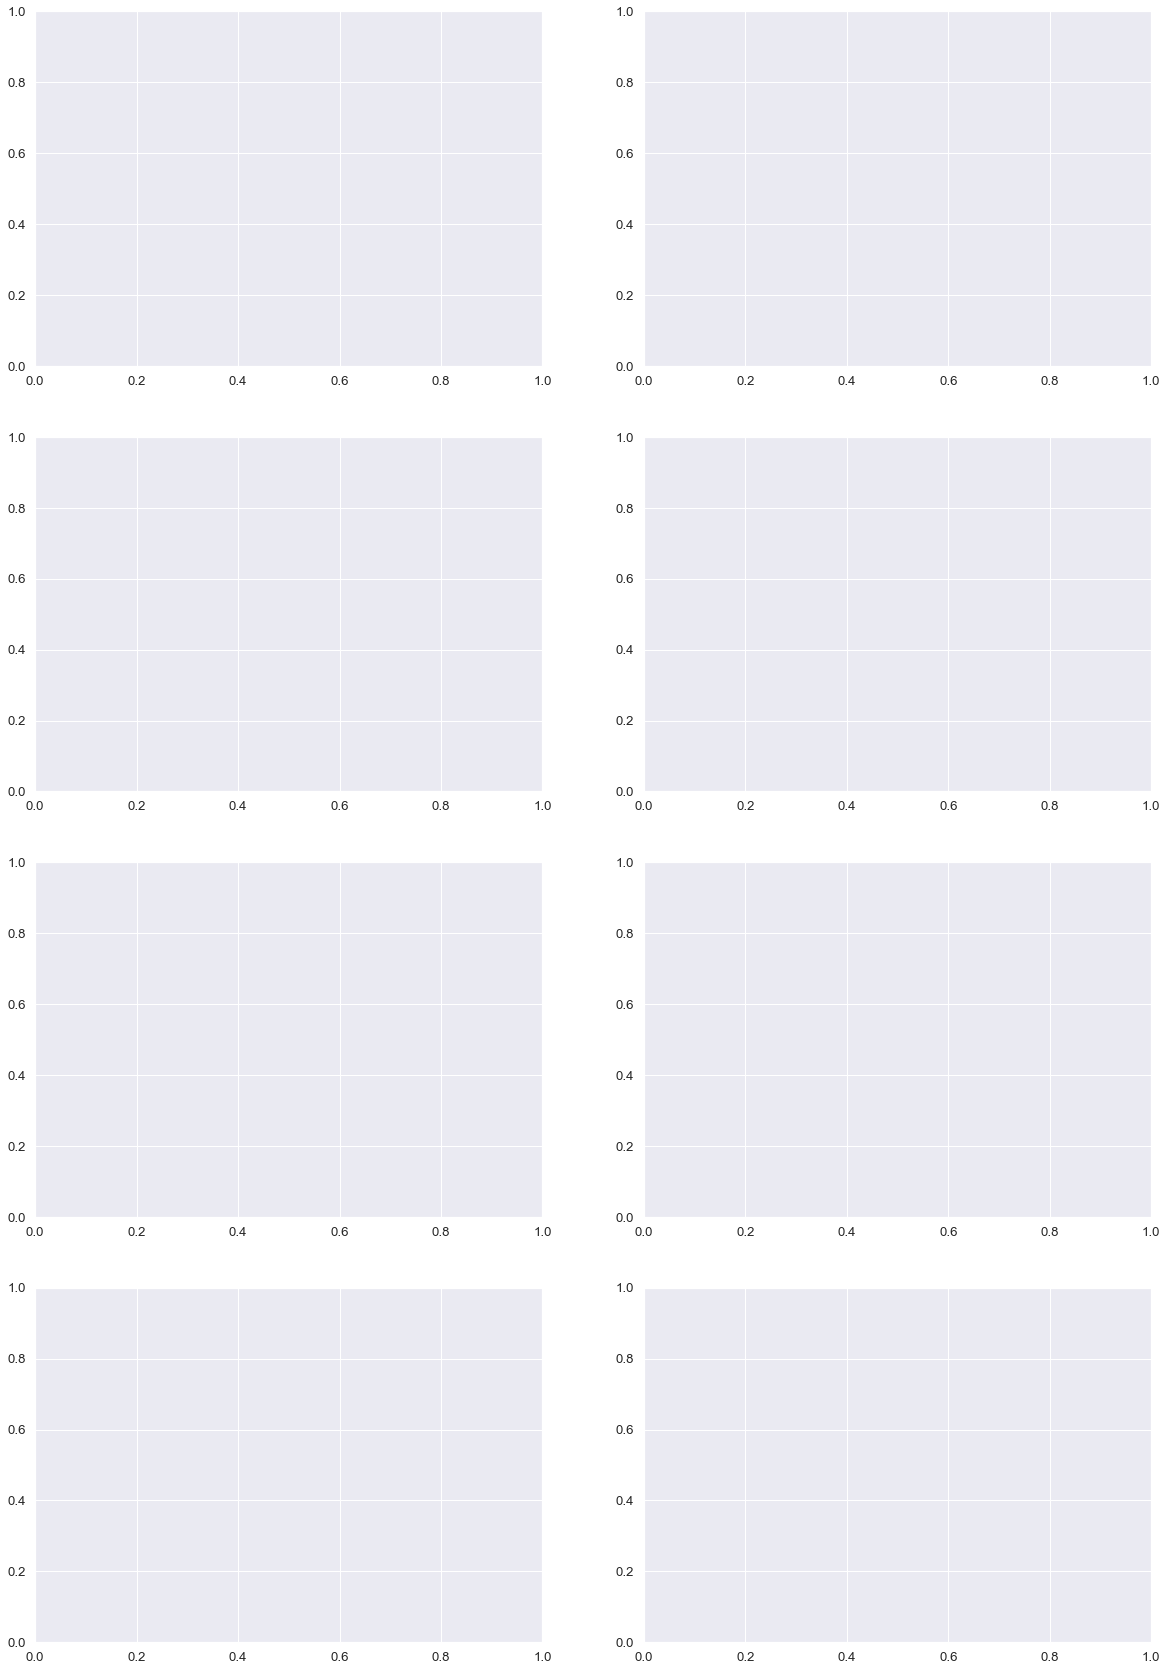

In [185]:
sb.set_style('darkgrid')
f, axes = plt.subplots(4,2, figsize = (20,30))

In [186]:
axes[0,0].scatter(x = 'Rooms', y = 'Price', data = melbourne_data, edgecolor = 'b')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Rooms v Price')

Text(0.5, 1.0, 'Rooms v Price')

In [187]:
axes[0,1].scatter(x = 'Distance', y = 'Price', data = melbourne_data, edgecolor = 'b')
axes[0,1].set_xlabel('Distance')
# axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Distance v Price')

Text(0.5, 1.0, 'Distance v Price')

In [188]:
axes[1,0].scatter(x = 'Bathroom', y = 'Price', data = melbourne_data, edgecolor = 'b')
axes[1,0].set_xlabel('Bathroom')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Bathroom v Price')

Text(0.5, 1.0, 'Bathroom v Price')

In [189]:
axes[1,1].scatter(x = 'Car', y = 'Price', data = melbourne_data, edgecolor = 'b')
axes[1,0].set_xlabel('Car')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Car v Price')

Text(0.5, 1.0, 'Car v Price')

In [190]:
axes[2,0].scatter(x = 'Landsize', y = 'Price', data = melbourne_data, edgecolor = 'b')
axes[2,0].set_xlabel('Landsize')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('Landsize v  Price')

Text(0.5, 1.0, 'Landsize v  Price')

In [191]:
axes[2,1].scatter(x = 'BuildingArea', y = 'Price', data = melbourne_data, edgecolor = 'b')
axes[2,1].set_xlabel('BuildingArea')
axes[2,1].set_ylabel('BuildingArea')
axes[2,1].set_title('BuildingArea v Price')

Text(0.5, 1.0, 'BuildingArea v Price')

In [192]:
axes[3,0].scatter(x = 'Age', y = 'Price', data = melbourne_data, edgecolor = 'b')
axes[3,0].set_xlabel('Age')
axes[3,0].set_ylabel('Price')
axes[3,0].set_ylabel('Age v Price')

Text(3.1999999999999886, 0.5, 'Age v Price')

In [193]:
axes[3,1].scatter(x = 'Propertycount', y = 'Price', data = melbourne_data, edgecolor = 'b')
axes[3,1].set_xlabel('Propertycount')
axes[3,1].set_ylabel('Price')
axes[3,1].set_title('Property Count v Price')

plt.show()

Text(0.5, 1.0, 'Variable Correlation')

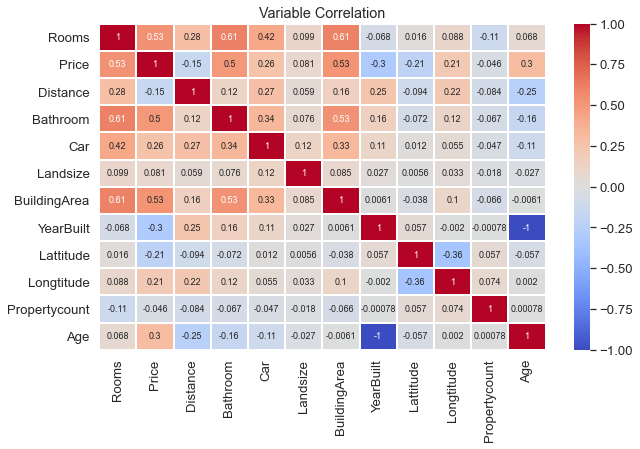

In [194]:
plt.figure(figsize=(10,6))
sb.heatmap(melbourne_data.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')

In [195]:
melbourne_data.select_dtypes(['float64','int64']).columns

Index(['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount',
       'Age'],
      dtype='object')

In [196]:
X =melbourne_data[['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 
            'BuildingArea', 'Propertycount','Age']]

y = melbourne_data['Price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 0)

In [197]:
from sklearn.linear_model import LinearRegression

Lim= LinearRegression()
Lim.fit(X_train,y_train)

LinearRegression()

In [198]:
y_pred = Lim.predict(X_test)

In [199]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 304513.1440901099
MSE: 258001327045.26624
RMSE: 507938.3102752403


In [200]:
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

R^2 = 0.47269078903192063


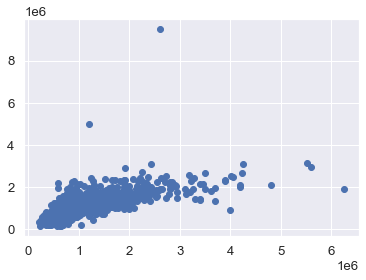

In [201]:
plt.scatter(y_test, y_pred)

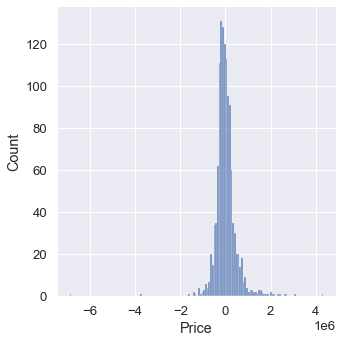

In [204]:
sb.displot((y_test - y_pred))

In [203]:
cf= pd.DataFrame(data = Lim.coef_, index = X.columns, columns = ['Coefficients'])
cf

,Coefficients
Rooms,120110.914296
Distance,-27926.242775
Bathroom,240457.780469
Car,54713.725770
Landsize,28.895807
BuildingArea,2581.583025
Propertycount,0.347492
Age,5315.501860
